Q1. What is a projection and how is it used in PCA?


Projection

 in the context of PCA is the process of representing data points in a lower-dimensional space. Imagine projecting a 3D object onto a 2D plane; you're losing some information, but you're capturing the most important aspects of the object.   

In PCA, we project the data onto new axes called principal components. These axes are chosen to capture the maximum variance in the data. By projecting the data onto these new axes, we reduce the dimensionality while preserving as much information as possible.   


Q2. How does the optimization problem in PCA work, and what is it trying to achieve?


PCA aims to find the directions (principal components) along which the data varies the most. This is achieved by solving an optimization problem:   

Maximize variance: The first principal component is the direction in which the data has the maximum variance.   
Orthogonality: Subsequent principal components are orthogonal (perpendicular) to the previous ones and capture the remaining variance.   
Mathematically, this involves finding the eigenvectors of the covariance matrix. The eigenvectors corresponding to the largest eigenvalues are the principal components.   


Q3. What is the relationship between covariance matrices and PCA?


The covariance matrix summarizes the relationships between variables in a dataset. It measures how much two variables change together.   

PCA heavily relies on the covariance matrix. The eigenvectors of the covariance matrix are the principal components. By decomposing the covariance matrix, we can identify the directions of maximum variance in the data.   


Q4. How does the choice of number of principal components impact the performance of PCA?


The number of principal components determines the dimensionality of the reduced data.

Too few components: Loss of important information, leading to poor performance.
Too many components: Little dimensionality reduction, increasing computational cost without significant benefits.
The optimal number of components depends on the specific dataset and the desired level of dimensionality reduction. Often, a scree plot (variance explained vs. number of components) helps visualize this.


Q5. How can PCA be used in feature selection, and what are the benefits of using it for this purpose?


PCA can be used for feature selection by selecting the most important principal components. The idea is that the principal components capture the most significant variations in the data.   

Benefits:

Reduces dimensionality: Directly addresses the curse of dimensionality.
Feature independence: Principal components are orthogonal, reducing multicollinearity.
Noise reduction: Can potentially filter out noise if it represents low variance.


Q6. What are some common applications of PCA in data science and machine learning?


PCA has various applications:

Dimensionality reduction: For visualization, data compression, and speeding up algorithms.   
Feature extraction: Creating new features that capture the most important information.
Noise reduction: By discarding components with low variance, noise can be reduced.   
Data visualization: To project high-dimensional data into lower dimensions for visualization.   
Preprocessing for other algorithms: Improving the performance of algorithms like clustering, classification, and regression.


Q7. What is the relationship between spread and variance in PCA?


Spread refers to how much the data points are distributed across a feature. Variance is a statistical measure of this spread.   

In PCA, the goal is to find the directions (principal components) where the data has the maximum spread or variance. By maximizing variance, we capture the most significant patterns in the data.   


Q8. How does PCA use the spread and variance of the data to identify principal components?


PCA calculates the covariance matrix, which measures the relationship between variables. The eigenvectors of the covariance matrix correspond to the principal components. These eigenvectors represent the directions of maximum variance in the data. By projecting the data onto these eigenvectors, we capture the data's spread along the most informative directions.   


Q9. How does PCA handle data with high variance in some dimensions but low variance in others?


PCA is well-suited for handling data with varying variances. It identifies the principal components based on the overall variance in the data. Components with high variance will be given more weight, while those with low variance will have less impact. This allows PCA to effectively capture the important patterns in the data, even when there are significant differences in variance across dimensions. 

# Example

Explained variance ratio for each component: [0.72962445 0.22850762]
Total explained variance: 0.9581320720000165


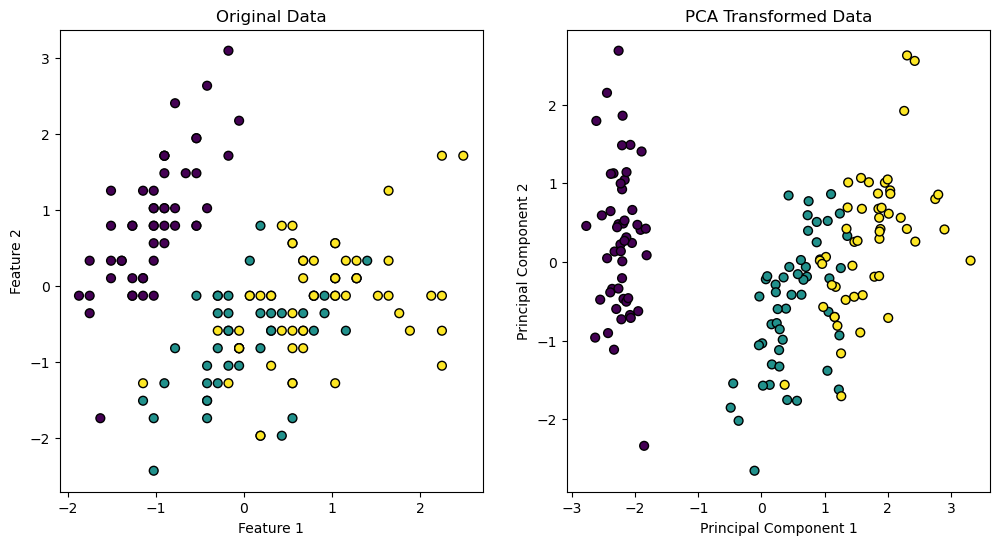

PCA components (directions of maximum variance):
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Print the explained variance ratio
print(f"Explained variance ratio for each component: {explained_variance}")
print(f"Total explained variance: {sum(explained_variance)}")

# Plot the original data vs PCA-transformed data
plt.figure(figsize=(12, 6))

# Original data plot
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# PCA-transformed data plot
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

# Print PCA components (directions of maximum variance)
print(f"PCA components (directions of maximum variance):\n{pca.components_}")

# For feature selection: keep only the most important principal components
# Number of principal components to keep
n_components_to_keep = 2
pca_full = PCA(n_components=n_components_to_keep)
X_pca_full = pca_full.fit_transform(X_scaled)
